In [2]:
source('helpers.R')

In [3]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [13]:
tumred = read.csv("../../../RawData/clinical_data/tumor-reduction-data.csv")
tumred$Patient <- tumred$patient

In [15]:
props <- prepost@meta.data %>% 
  filter(cell_type %!in% c('CD4+ CAR T','CD8+ CAR T')) %>%
  filter(Day %in% c("D0","D7")) %>% 
  group_by(Patient, Day) %>%
  summarise(prop = mean(cell_type == "Treg"), .groups = "drop") %>%
  tidyr::pivot_wider(names_from  = Day, values_from = prop, names_prefix = "prop_") %>%
  mutate(delta_prop = 100*(prop_D7 - prop_D0))


In [16]:
df <- props %>% inner_join(tumred, by = "Patient")

In [17]:
df$reduction = - df$reduction

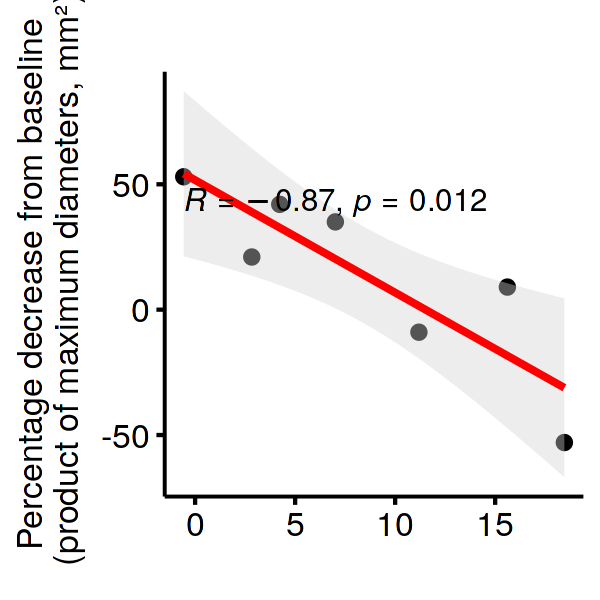

In [19]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=200)
ggscatter(df, x = "delta_prop", y = "reduction", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method = "pearson",     # use Spearman’s rho
          add.params = list(color = "red", fill = "lightgray"), xlab = "",  
          ylab = "Percentage decrease from baseline\n (product of maximum diameters, mm²)", title = "")